In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Youtube01-psy.csv')

In [3]:
data.shape

(350, 5)

data

In [4]:
data

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


In [5]:

spam_class = (data.CLASS == 1).astype(bool)

C:\Users\Sahil\Anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLASS', ylabel='count'>

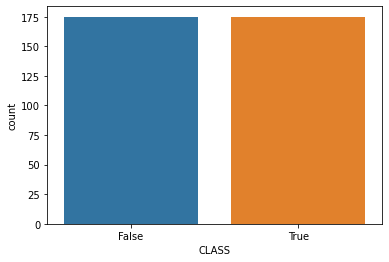

In [6]:
# sns.histplot(spam_class,x=spam_class.index,y= spam_class[0])
sns.countplot(spam_class)

In [7]:
data = data.drop(columns=['COMMENT_ID','AUTHOR','DATE'])

In [8]:
import  nltk as  nltk 
from nltk import NaiveBayesClassifier 
from nltk.classify import accuracy as nltk_accuracy
nltk.download('stopwords')
import random 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
count_vectorizer = CountVectorizer(stop_words='english') 
train_tc = count_vectorizer.fit_transform(data.CONTENT) 

In [10]:
print(train_tc)

  (0, 587)	1
  (0, 274)	1
  (0, 1122)	1
  (0, 272)	1
  (0, 662)	1
  (1, 274)	1
  (1, 272)	1
  (1, 569)	1
  (1, 542)	1
  (1, 793)	1
  (1, 1158)	1
  (1, 768)	1
  (1, 767)	1
  (1, 1207)	1
  (1, 975)	1
  (1, 684)	1
  (1, 689)	1
  (1, 306)	1
  (1, 1044)	1
  (2, 644)	1
  (2, 1081)	1
  (2, 953)	1
  (2, 782)	1
  (2, 301)	1
  (3, 272)	1
  :	:
  (347, 198)	1
  (348, 542)	1
  (348, 301)	2
  (348, 585)	1
  (348, 1083)	1
  (348, 171)	1
  (348, 183)	1
  (348, 860)	1
  (348, 570)	1
  (348, 524)	1
  (348, 389)	1
  (348, 849)	2
  (348, 411)	2
  (348, 1030)	1
  (348, 361)	1
  (348, 595)	1
  (348, 248)	1
  (349, 252)	1
  (349, 217)	3
  (349, 915)	1
  (349, 1164)	1
  (349, 552)	1
  (349, 1039)	1
  (349, 321)	1
  (349, 1092)	1


In [11]:
print("\nDimensions of training data:", train_tc.shape) 


Dimensions of training data: (350, 1259)


In [12]:
# Create the tf-idf transformer 
tfidf = TfidfTransformer() 
train_tfidf = tfidf.fit_transform(train_tc) 

In [13]:
train_tfidf = train_tfidf.toarray()

In [14]:
data_frame_tfidf = pd.DataFrame(data= train_tfidf)

In [15]:
type(data_frame_tfidf)

pandas.core.frame.DataFrame

In [16]:
data_frame_tfidf

,0,1,2,3,4,5,6,7,8,9,...,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350874,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data_frame_tfidf.sample(frac=1)

,0,1,2,3,4,5,6,7,8,9,...,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Define the number of samples used for train and test 
num_train = int(0.75 * len(data_frame_tfidf)) 

In [19]:
train_feature,train_target,test_feature,test_target = train_tfidf[:num_train], data.CLASS[:num_train],train_tfidf[num_train:],data.CLASS[num_train:] 

In [20]:
classifier = MultinomialNB().fit(train_feature,train_target)

In [21]:
# Predict the output categories 
predictions = classifier.predict(test_feature) 

In [22]:
len(predictions)

88

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [24]:
confusion_matrix(test_target,predictions)

array([[45,  4],
       [ 5, 34]], dtype=int64)

In [25]:
scores = accuracy_score(test_target, predictions, normalize=True)
print (scores)

0.8977272727272727


In [26]:
# Define test data  
input_data = [ 
    'You need to be careful with cars when you are driving on slippery roads',  
    'I saw this while eating popcorn and spilled so much at that part  !', 
    'Huh, anyway check out this you[tube] channel:', 
    'Wow nice video',
    'I loved this',
    'cool video! thought it was great!',  
]

In [27]:
 
train_tc_input = count_vectorizer.transform(input_data) 

In [28]:
print(train_tc_input )

  (0, 393)	1
  (0, 789)	1
  (1, 952)	1
  (2, 272)	1
  (2, 274)	1
  (2, 587)	1
  (2, 1122)	1
  (3, 796)	1
  (3, 1159)	1
  (3, 1225)	1
  (4, 718)	1
  (5, 321)	1
  (5, 532)	1
  (5, 1092)	1
  (5, 1159)	1


In [29]:
train_tc_input.shape

(6, 1259)

In [30]:
 
input_tfid= tfidf.transform(train_tc_input) 

In [31]:
train_tc_input.shape

(6, 1259)

In [32]:
print(train_tc_input)

  (0, 393)	1
  (0, 789)	1
  (1, 952)	1
  (2, 272)	1
  (2, 274)	1
  (2, 587)	1
  (2, 1122)	1
  (3, 796)	1
  (3, 1159)	1
  (3, 1225)	1
  (4, 718)	1
  (5, 321)	1
  (5, 532)	1
  (5, 1092)	1
  (5, 1159)	1


In [33]:
classifier.predict(train_tc_input)

array([1, 0, 1, 0, 0, 0], dtype=int64)

In [34]:

print('\n', "Actual   Predicted")
print('\n', "="*15) 
for Actual, Predicted in zip(test_target, predictions): 
    # 'item' is a 'csr_matrix' data structure 
    # output = [word] + [str(freq) for freq in item.data] 
    print(f"  {Actual}          {Predicted}" ) 


 Actual   Predicted

  0          0
  0          0
  0          1
  0          0
  0          0
  0          0
  1          1
  0          1
  0          0
  0          0
  0          0
  1          0
  0          0
  0          0
  0          0
  1          1
  0          0
  0          0
  0          0
  0          0
  0          0
  0          1
  0          0
  0          0
  0          0
  1          0
  1          0
  0          1
  0          0
  0          0
  1          1
  1          1
  1          1
  0          0
  1          0
  1          1
  1          1
  1          0
  1          1
  1          1
  1          1
  1          1
  0          0
  1          1
  0          0
  1          1
  0          0
  1          1
  0          0
  1          1
  0          0
  1          1
  0          0
  1          1
  0          0
  1          1
  1          1
  1          1
  0          0
  0          0
  0          0
  1          1
  0          0
  1          1
  0          0
  1